<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/221010_ksat_paper_analysis_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 1005)

## Read data file from Github, install packages

data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv (17 items)

data2: Adding 2024SN and 20249P to explore the difference
[link](https://raw.githubusercontent.com/MK316/Workingpapers/main/ksatdata_2024.csv)

In [4]:
#@markdown
%%capture
!pip install textstat

import textstat
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/ksatdata_2024.csv'
df1 = pd.read_csv(url)
df1

,Year,QN,Passage
0,2015SN,Q18,One difference between winners and losers is h...
1,2015SN,Q19,"As I walked to the train station, I felt the w..."
2,2015SN,Q20,Many disciplines are better learned by enterin...
3,2015SN,Q21,The most normal and competent child encounters...
4,2015SN,Q22,The most normal and competent child encounters...
...,...,...,...
165,20249P,Q36,The intuitive ability to classify and generali...
166,20249P,Q37,Plants show finely tuned adaptive responses wh...
167,20249P,Q38,The shift from analog to digital technology si...
168,20249P,Q39,Acknowledging the making of artworks does not ...


# Adding a colum with length info

Data: df2 = df1

In [6]:
df2 = df1

In [7]:
df2['N_Sents'] = df2['Passage'].apply(textstat.sentence_count)

In [8]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Words'] = splen
df2

,Year,QN,Passage,N_Sents,Splits,N_Words
0,2015SN,Q18,One difference between winners and losers is h...,8,"[One, difference, between, winners, and, loser...",107
1,2015SN,Q19,"As I walked to the train station, I felt the w...",10,"[As, I, walked, to, the, train, station,, I, f...",123
2,2015SN,Q20,Many disciplines are better learned by enterin...,6,"[Many, disciplines, are, better, learned, by, ...",117
3,2015SN,Q21,The most normal and competent child encounters...,7,"[The, most, normal, and, competent, child, enc...",128
4,2015SN,Q22,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128
...,...,...,...,...,...,...
165,20249P,Q36,The intuitive ability to classify and generali...,7,"[The, intuitive, ability, to, classify, and, g...",166
166,20249P,Q37,Plants show finely tuned adaptive responses wh...,8,"[Plants, show, finely, tuned, adaptive, respon...",181
167,20249P,Q38,The shift from analog to digital technology si...,8,"[The, shift, from, analog, to, digital, techno...",193
168,20249P,Q39,Acknowledging the making of artworks does not ...,7,"[Acknowledging, the, making, of, artworks, doe...",190


In [9]:
#@markdown {re} count syllables: count_syllables(word)
import re

def count_syllables(word):
    return len(
        re.findall('(?!e$)[aeiouy]+', word, re.I) +
        re.findall('^[^aeiouy]*e$', word, re.I)
    )

In [10]:
# function created
count_syllables("syllabilifcation")

6

In [11]:
#@markdown Adding a column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)
df2['String'] = length
df2

,Year,QN,Passage,N_Sents,Splits,N_Words,String
0,2015SN,Q18,One difference between winners and losers is h...,8,"[One, difference, between, winners, and, loser...",107,635
1,2015SN,Q19,"As I walked to the train station, I felt the w...",10,"[As, I, walked, to, the, train, station,, I, f...",123,628
2,2015SN,Q20,Many disciplines are better learned by enterin...,6,"[Many, disciplines, are, better, learned, by, ...",117,715
3,2015SN,Q21,The most normal and competent child encounters...,7,"[The, most, normal, and, competent, child, enc...",128,737
4,2015SN,Q22,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128,724
...,...,...,...,...,...,...,...
165,20249P,Q36,The intuitive ability to classify and generali...,7,"[The, intuitive, ability, to, classify, and, g...",166,1058
166,20249P,Q37,Plants show finely tuned adaptive responses wh...,8,"[Plants, show, finely, tuned, adaptive, respon...",181,1134
167,20249P,Q38,The shift from analog to digital technology si...,8,"[The, shift, from, analog, to, digital, techno...",193,1296
168,20249P,Q39,Acknowledging the making of artworks does not ...,7,"[Acknowledging, the, making, of, artworks, doe...",190,1110


In [12]:
df2['N_Sents'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015SN,17.0,7.470588,1.280510,6.0,6.0,8.0,8.0,10.0
2016SN,17.0,7.411765,1.769845,4.0,7.0,7.0,9.0,10.0
2017SN,17.0,7.529412,2.124784,5.0,6.0,7.0,8.0,13.0
2018SN,17.0,8.058824,2.164214,5.0,6.0,8.0,9.0,12.0
2019SN,17.0,8.294118,2.663755,5.0,7.0,8.0,9.0,15.0
2020SN,17.0,7.647059,2.714341,5.0,6.0,7.0,9.0,15.0
2021SN,17.0,8.588235,2.450990,6.0,7.0,8.0,10.0,14.0
2022SN,17.0,6.941176,1.088037,5.0,6.0,7.0,8.0,9.0
20249P,17.0,8.000000,2.091650,5.0,7.0,8.0,8.0,13.0


In [13]:
df2.describe()

,N_Sents,N_Words,String
count,170.000000,170.000000,170.000000
mean,7.758824,153.652941,938.341176
std,2.048396,20.438177,152.744754
min,4.000000,105.000000,575.000000
25%,6.000000,141.000000,844.750000
50%,7.000000,157.000000,962.500000
75%,9.000000,169.000000,1049.000000
max,15.000000,195.000000,1296.000000


## Number of word types, tokens, and sentences

In [14]:
from nltk.tokenize.regexp import WhitespaceTokenizer
from nltk.tokenize.regexp import WordPunctTokenizer

In [15]:
n = len(df2['N_Words'])
token_total = 0
type_total = 0
sent_total = 0
for i in range(0,n):
  tokens = len(WhitespaceTokenizer().tokenize(df2['Passage'][i]))
  token_total = token_total + tokens
  types = len(set(df2['Passage'][i]))
  type_total = type_total + types
  sents = df2["N_Sents"][i]
  sent_total = sent_total + sents

print("Total Number of tokens: %d"%token_total)
print("Total Number of types: %d"%type_total)
print("Total Number of sentences: %d"%sent_total)

Total Number of tokens: 26121
Total Number of types: 6335
Total Number of sentences: 1319


## Text lengh and boxplot

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
# sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":140,"axes.labelsize":60},style="white") # font size doesn't work
#Note: this doesn't work because dd is not defined
# # ax = sns.boxplot (y=df2)
# # ax.set_ylim([0, 210])

# sns.set_theme(style='white')
# #dd=pd.melt(df2,id_vars=['QN'],value_vars=['N_Words'],var_name='Tokens')
# ax = sns.boxplot(x='QN',y='value',data=dd,hue='Tokens',palette="Accent")
# ax.set_ylim([80,220])
# ax.set(xlabel='Question Numbers', ylabel='N of words (count)')
# plt.savefig('boxplot_QN.png')

# Lexical Diversity Indices (10 types)

## Getting LD indices

In [18]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [19]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  lem.append(LEM)

df2['Lemma'] = lem

In [20]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

N of sentences

In [21]:
!pip install textstat
import textstat

Result file: N of sentences included

In [22]:
df2['N_Sents'] = df2['Passage'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

## Result file

In [23]:
df2.describe()

,N_Sents,N_Words,String,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,7.758824,153.652941,938.341176,0.608739,7.504702,0.900424,0.045603,0.775039,0.773951,0.805296,72.570126,72.878609,65.925284
std,2.048396,20.438177,152.744754,0.057906,0.705510,0.018443,0.008153,0.048833,0.045921,0.038200,22.730851,22.329818,22.255733
min,4.000000,105.000000,575.000000,0.451282,5.376082,0.843935,0.029163,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,6.000000,141.000000,844.750000,0.573561,7.046582,0.890040,0.039758,0.750000,0.750079,0.784874,55.973289,57.707949,52.507982
50%,7.000000,157.000000,962.500000,0.609181,7.505819,0.900039,0.046061,0.780000,0.775631,0.807692,70.429879,68.903657,62.401067
75%,9.000000,169.000000,1049.000000,0.650685,7.967905,0.914616,0.050116,0.809167,0.805781,0.832165,84.736799,85.867532,77.727032
max,15.000000,195.000000,1296.000000,0.728972,9.631312,0.933882,0.073482,0.890000,0.895000,0.882549,185.000000,166.210811,174.107143


In [24]:
df2['MATTR'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015SN,17.0,0.766036,0.042779,0.667755,0.755963,0.772696,0.795405,0.813165
2016SN,17.0,0.773909,0.064759,0.581905,0.755575,0.783291,0.808689,0.866111
2017SN,17.0,0.783982,0.030315,0.728142,0.768939,0.789333,0.802222,0.843504
2018SN,17.0,0.766674,0.043237,0.659032,0.753333,0.776147,0.799063,0.821569
2019SN,17.0,0.760148,0.047022,0.675960,0.719439,0.766786,0.805781,0.832034
2020SN,17.0,0.775398,0.052127,0.675960,0.744882,0.770909,0.818763,0.855200
2021SN,17.0,0.775129,0.036447,0.708547,0.750076,0.776852,0.782500,0.851600
2022SN,17.0,0.765109,0.045013,0.687068,0.749687,0.774182,0.794667,0.835238
20249P,17.0,0.790536,0.049155,0.710000,0.758367,0.775214,0.817727,0.895000


In [25]:
df2['MATTR'].describe()

count    170.000000
mean       0.773951
std        0.045921
min        0.581905
25%        0.750079
50%        0.775631
75%        0.805781
max        0.895000
Name: MATTR, dtype: float64

In [26]:
df2['HDD'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015SN,17.0,0.801174,0.040385,0.723288,0.776571,0.809109,0.826796,0.856121
2016SN,17.0,0.812646,0.041819,0.686500,0.794061,0.820248,0.838549,0.860809
2017SN,17.0,0.808501,0.027099,0.757223,0.794441,0.804080,0.825001,0.853785
2018SN,17.0,0.799011,0.036200,0.719713,0.775315,0.807006,0.832689,0.843540
2019SN,17.0,0.794808,0.044512,0.709029,0.764589,0.797627,0.828387,0.871256
2020SN,17.0,0.807145,0.049040,0.709029,0.784797,0.810360,0.842698,0.880651
2021SN,17.0,0.803674,0.033408,0.752977,0.778019,0.797810,0.834443,0.855967
2022SN,17.0,0.795772,0.041129,0.708912,0.782583,0.804126,0.818390,0.871100
20249P,17.0,0.820058,0.034827,0.733451,0.805243,0.822226,0.827332,0.882549


In [27]:
df2['HDD'].describe()

count    170.000000
mean       0.805296
std        0.038200
min        0.686500
25%        0.784874
50%        0.807692
75%        0.832165
max        0.882549
Name: HDD, dtype: float64

# Plotting

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

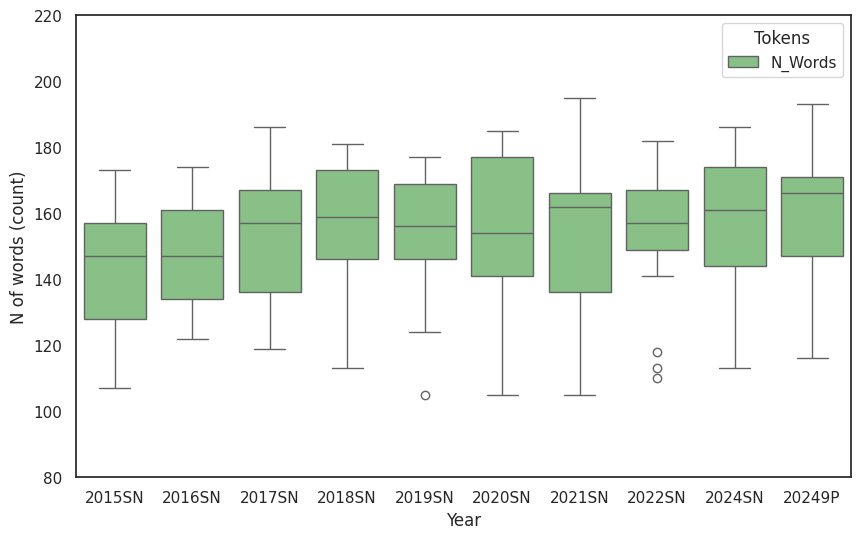

In [43]:
sns.set(rc={'figure.figsize':(10,6),"font.size":40,"axes.titlesize":140,"axes.labelsize":60},style="white") # font size doesn't work
# ax = sns.boxplot (y=df2)
# ax.set_ylim([0, 210])

sns.set_theme(style='white')
dd=pd.melt(df2,id_vars=['Year'],value_vars=['N_Words'],var_name='Tokens')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='Tokens',palette="Accent")
ax.set_ylim([80,220])
ax.set(xlabel='Year', ylabel='N of words (count)')
plt.savefig('boxplot_Nwords.png')

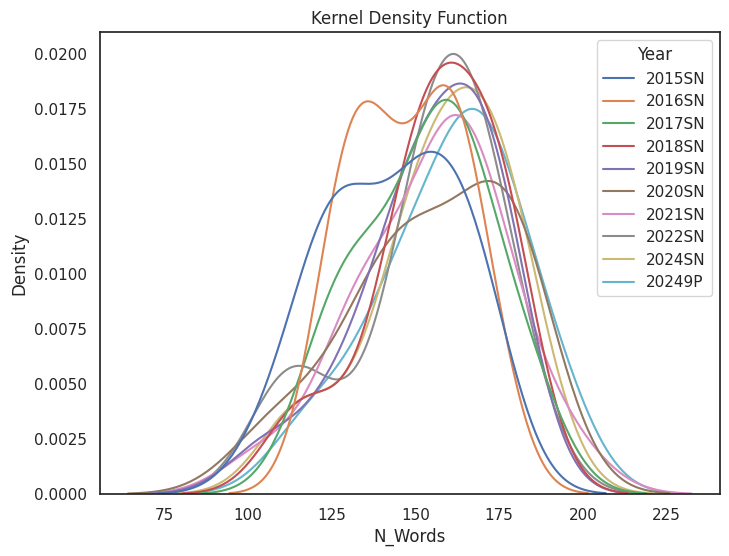

In [30]:
sns.kdeplot(x='N_Words', data=df2, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')

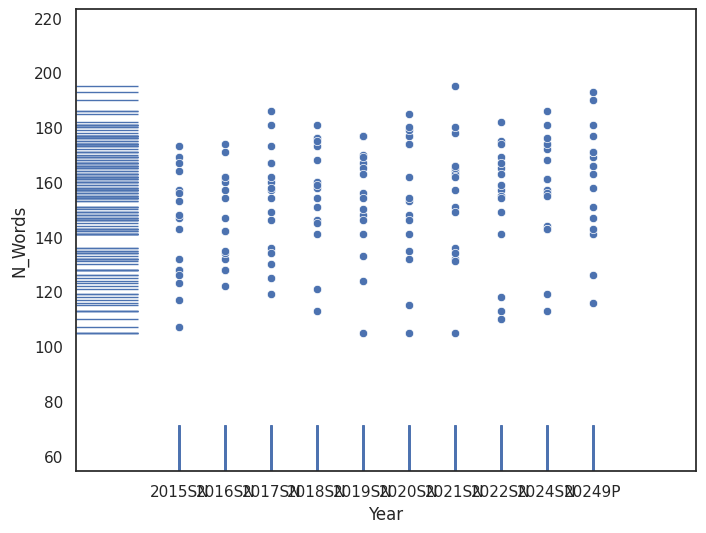

In [31]:
sns.scatterplot(data=df2, x="Year", y="N_Words")
sns.rugplot(data=df2, x="Year", y="N_Words", height=.1)
plt.savefig('Rug_Nsplit.png')

문항별 어휘수 및 문장수

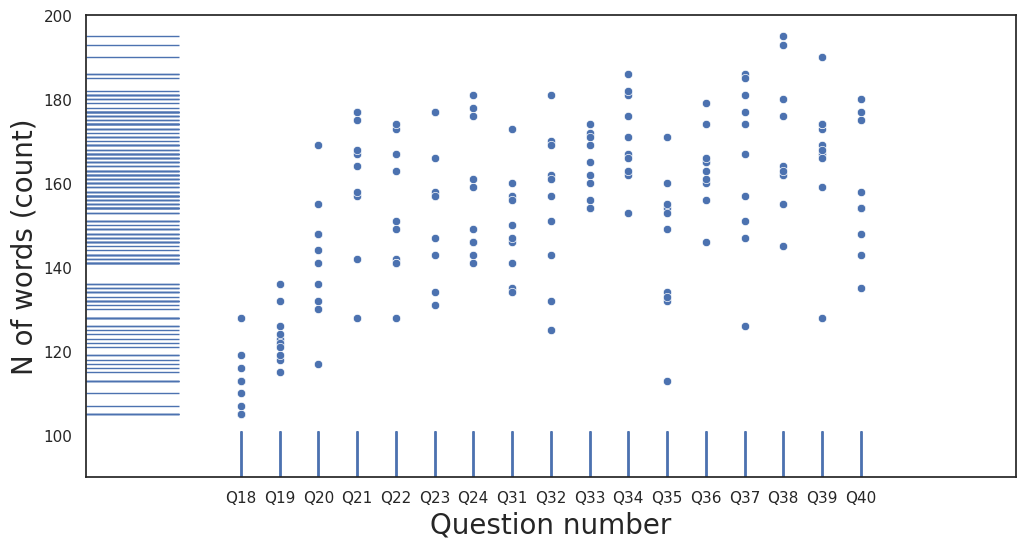

In [32]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df2, x="QN", y="N_Words")
ax = sns.rugplot(data=df2, x="QN", y="N_Words", height=.1)
ax.set_ylim([90,200])
ax.set(xlabel='Question number', ylabel='N of words (count)')
plt.savefig('Rug_Nsplit_byQ.png')

# Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD

In [33]:
df3 = df2
for col in df3.columns:
    print(col)

Year
QN
Passage
N_Sents
Splits
N_Words
String
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid


In [34]:
df3 = df2[['Year','QN','N_Words','N_Sents','TTR','MATTR','HDD','MTLD']]
df3.head()

,Year,QN,N_Words,N_Sents,TTR,MATTR,HDD,MTLD
0,2015SN,Q18,107,8,0.728972,0.794828,0.841506,110.542069
1,2015SN,Q19,123,10,0.666667,0.795405,0.824749,62.363391
2,2015SN,Q20,117,6,0.623932,0.758529,0.776571,53.164604
3,2015SN,Q21,128,7,0.703125,0.813165,0.848132,112.313725
4,2015SN,Q22,128,6,0.703125,0.813165,0.848132,112.313725


In [35]:
df3.groupby('Year')['MTLD'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015SN,17.0,70.132748,23.188553,43.310215,53.164604,64.850195,83.004745,112.313725
2016SN,17.0,76.792884,23.264766,33.165609,61.406326,79.756780,90.865342,128.591868
2017SN,17.0,68.440139,16.220003,51.828086,54.530003,64.375632,76.120146,100.387122
2018SN,17.0,65.848274,18.339833,35.609356,57.055556,61.101336,77.132075,104.167293
2019SN,17.0,67.598354,22.591239,34.687500,53.672626,61.205022,83.649431,112.822093
2020SN,17.0,72.553498,22.291308,34.687500,54.199224,74.704918,84.541450,110.638889
2021SN,17.0,70.232853,15.161990,47.805145,57.070312,74.518367,82.715676,90.675093
2022SN,17.0,71.982299,19.493392,35.844810,63.181845,74.648523,87.299160,105.312025
20249P,17.0,88.217711,37.239238,44.309414,66.877998,77.752165,87.463853,185.000000


In [36]:
df3['MTLD'].describe()

count    170.000000
mean      72.570126
std       22.730851
min       33.165609
25%       55.973289
50%       70.429879
75%       84.736799
max      185.000000
Name: MTLD, dtype: float64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

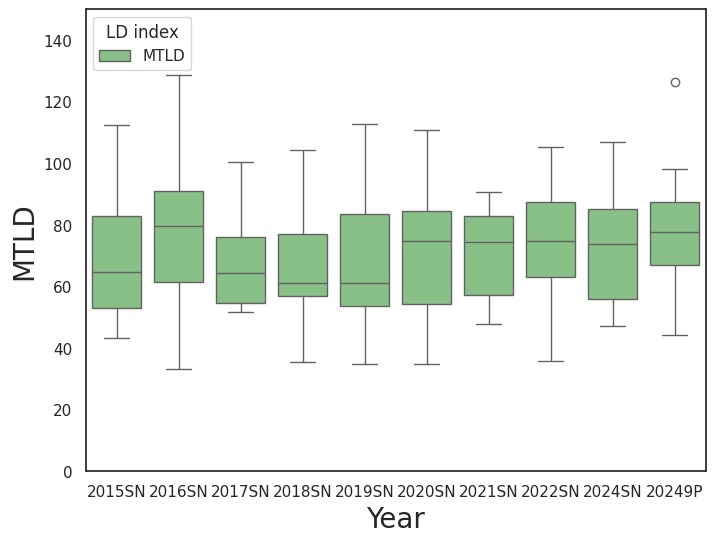

In [41]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Year'],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([0,150])
ax.set(xlabel='Year', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_year.png')

+ MTLD (Measure of Textual Lexical Diversity) is a statistical tool used to assess the lexical diversity or richness in a given text. Lexical diversity refers to the range and distribution of different words used in a text. MTLD is particularly useful in linguistics and language teaching to evaluate the complexity and variety of vocabulary in written or spoken language.

+ The MTLD score is based on the principle that a text with a higher variety of words (i.e., more unique words) is more lexically diverse than a text with fewer unique words. The score is calculated by segmenting the text into parts until the lexical richness in each part falls below a certain threshold, then averaging the lengths of these parts.

+ Interpreting the MTLD score can be subjective, but here's a general guideline:

  + Higher MTLD Score: Indicates greater lexical diversity. The text uses a wider range of vocabulary and is likely to be more complex. Such texts are often more challenging for readers or listeners, especially for non-native speakers or learners of the language.

  + Lower MTLD Score: Indicates lesser lexical diversity. The text relies on a more limited range of vocabulary, which might be repetitive or simpler. Such texts are generally easier to understand and are more suitable for language learners or readers with limited vocabulary in the language.

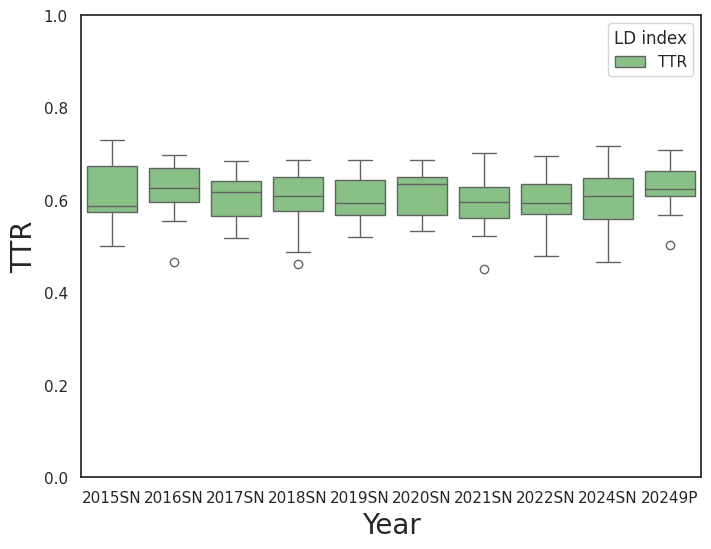

In [47]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Year'],value_vars=['TTR'],var_name='LD index')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([0,1])
ax.set(xlabel='Year', ylabel='TTR')
plt.savefig('boxplot_TTR_by_year.png')

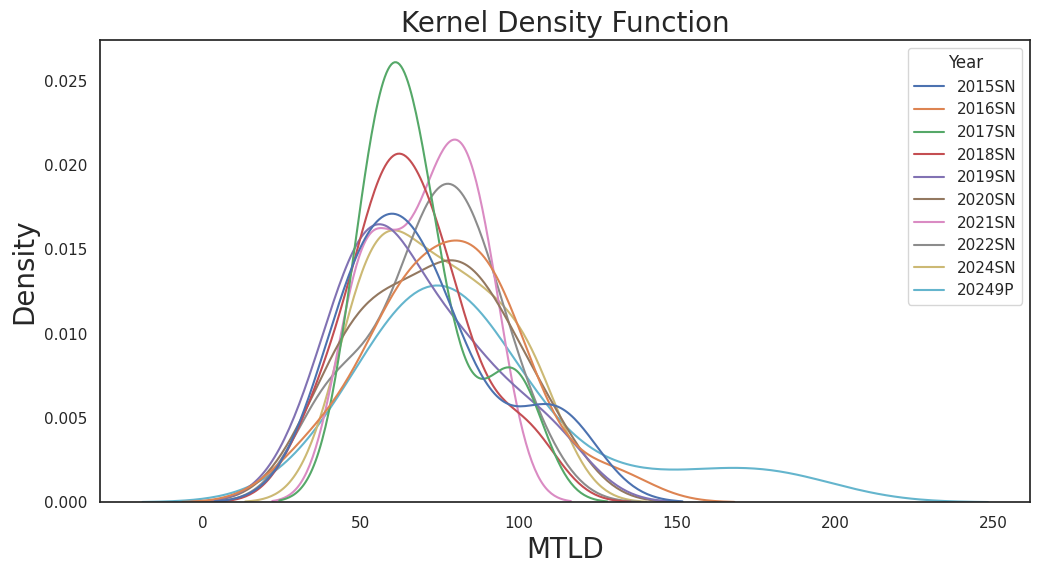

In [38]:
sns.kdeplot(x='MTLD', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MTLD.png')

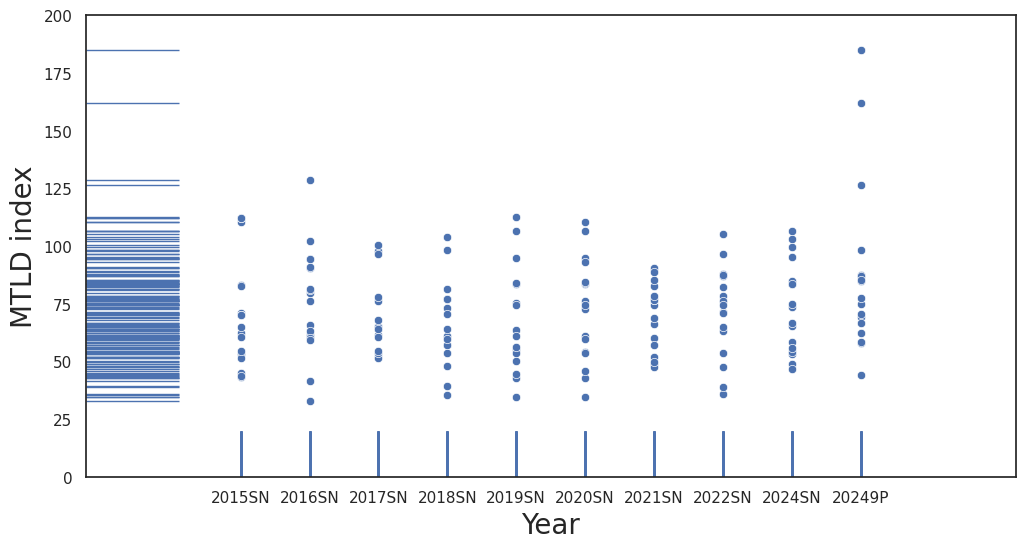

In [41]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df3, x="Year", y="MTLD")
ax = sns.rugplot(data=df3, x="Year", y="MTLD", height=.1)
ax.set_ylim([0,200])
# ax.set_xlim([2014,2025])
ax.set(xlabel='Year', ylabel='MTLD index')
plt.savefig('Rug_MTLD_byYear.png')

+ Find the max in 20249P

In [89]:
# Filter the DataFrame for the year 20249P
df_20249P = df3[df3['Year'] == '20249P']

# Find the maximum value of the MTLD index for the year 20249P
max_mtld_20249P = df_20249P['MTLD'].max()

print(f"The highest MTLD value in the year 20249P is: {max_mtld_20249P}")


The highest MTLD value in the year 20249P is: 185.0


In [90]:
df_20249P

,Year,QN,N_Words,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
153,20249P,Q18,116,11,0.663793,0.806567,0.826004,84.801915,77.74,5.0,7.30,7.8,9.78,5.444444,9.06,4th and 5th grade
154,20249P,Q19,126,13,0.674603,0.770390,0.822226,74.907425,95.57,2.3,4.16,3.0,4.09,4.200000,6.64,4th and 5th grade
155,20249P,Q20,169,11,0.502959,0.710000,0.733451,44.309414,72.76,6.9,8.05,7.1,7.24,6.750000,6.27,6th and 7th grade
156,20249P,Q21,158,5,0.620253,0.828807,0.817452,87.463853,39.81,15.5,17.10,19.3,13.30,22.666667,10.14,15th and 16th grade
157,20249P,Q22,151,8,0.662252,0.804118,0.827332,87.276709,43.83,11.8,13.39,14.1,14.16,13.800000,10.12,13th and 14th grade
158,20249P,Q23,166,7,0.584337,0.750085,0.797333,57.993935,39.26,13.6,16.19,15.2,12.83,19.000000,9.42,15th and 16th grade
159,20249P,Q24,141,5,0.609929,0.764348,0.786164,69.466933,34.39,15.5,17.52,18.4,14.05,13.400000,10.86,15th and 16th grade
160,20249P,Q31,147,7,0.653061,0.758367,0.818138,70.794594,58.62,10.3,13.03,13.7,12.42,12.600000,9.51,12th and 13th grade
161,20249P,Q32,143,8,0.594406,0.739787,0.789531,58.420112,61.87,9.1,11.35,10.8,9.97,8.142857,9.19,8th and 9th grade
162,20249P,Q33,171,8,0.709302,0.868130,0.878379,161.953271,49.75,11.6,14.88,13.9,12.24,14.000000,9.59,14th and 15th grade


MATTR

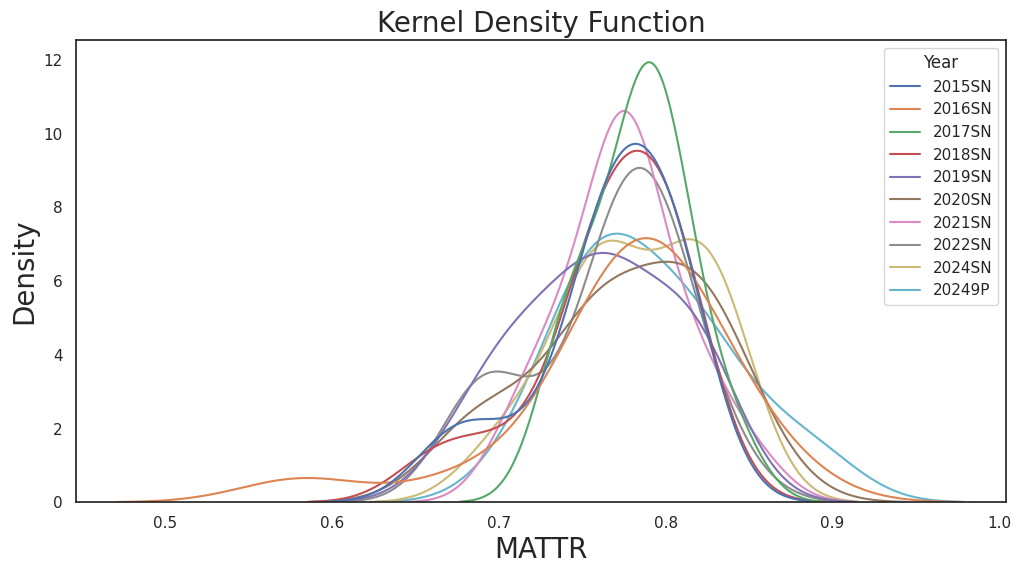

In [48]:
sns.kdeplot(x='MATTR', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')

In [ ]:
df3.groupby('Year')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,0.766036,0.042779,0.667755,0.755963,0.772696,0.795405,0.813165
2016,17.0,0.773909,0.064759,0.581905,0.755575,0.783291,0.808689,0.866111
2017,17.0,0.783982,0.030315,0.728142,0.768939,0.789333,0.802222,0.843504
2018,17.0,0.766674,0.043237,0.659032,0.753333,0.776147,0.799063,0.821569
2019,17.0,0.760403,0.046946,0.675960,0.719439,0.766786,0.805781,0.832034
2020,17.0,0.775653,0.051979,0.675960,0.749219,0.770909,0.818763,0.855200
2021,17.0,0.775449,0.036112,0.708547,0.750076,0.776852,0.782500,0.851600
2022,17.0,0.765262,0.045270,0.687068,0.749687,0.774182,0.794667,0.837838


# [2] Readability

## install packages

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

## Readability indices & Plotting for papers

In [52]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Passage'])):
  text = df2['Passage'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


<ipython-input-52-07716e1c57c9>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FRE'] = FRE
<ipython-input-52-07716e1c57c9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FKG'] = FKG
<ipython-input-52-07716e1c57c9>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

df3: LD(4 indices)  + Readability

In [53]:
df3.to_csv('results_all_1005.csv')

In [54]:
df3.head()

,Year,QN,N_Words,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,2015SN,Q18,107,8,0.728972,0.794828,0.841506,110.542069,74.79,6.2,8.72,8.5,10.03,6.750000,8.73,8th and 9th grade
1,2015SN,Q19,123,10,0.666667,0.795405,0.824749,62.363391,84.37,4.5,6.87,4.1,4.80,7.428571,6.94,4th and 5th grade
2,2015SN,Q20,117,6,0.623932,0.758529,0.776571,53.164604,51.68,10.9,13.95,12.4,11.95,10.833333,9.60,10th and 11th grade
3,2015SN,Q21,128,7,0.703125,0.813165,0.848132,112.313725,69.82,8.1,11.70,9.7,9.11,12.200000,8.74,8th and 9th grade
4,2015SN,Q22,128,6,0.703125,0.813165,0.848132,112.313725,66.78,9.2,12.90,11.2,9.11,12.200000,8.89,8th and 9th grade


In [ ]:
47/136

0.34558823529411764

In [55]:
a = df3[df3['FRE'] < 50]
a.shape

(82, 16)

In [57]:
df4 = df3
df4 = df4[['Year','QN','N_Sents','TTR','MTLD','FRE','FKG','GF','DCRS']]

Here's a general guide to what the scores usually indicate:

+ 90-100: Very Easy. Easily understood by an average 11-year-old student.
+ 80-89: Easy. Comfortable reading for average 12 to 15-year-old students.
+ 70-79: Fairly Easy. Easily understood by 13 to 15-year-old students.
+ 60-69: Standard/Plain English. Easily understood by 16 to 17-year-old students.
+ 50-59: Fairly Difficult. Challenging for lower secondary school students.
+ 30-49: Difficult. Best understood by university graduates.
+ 0-29: Very Confusing. Best understood by advanced degree-holders.

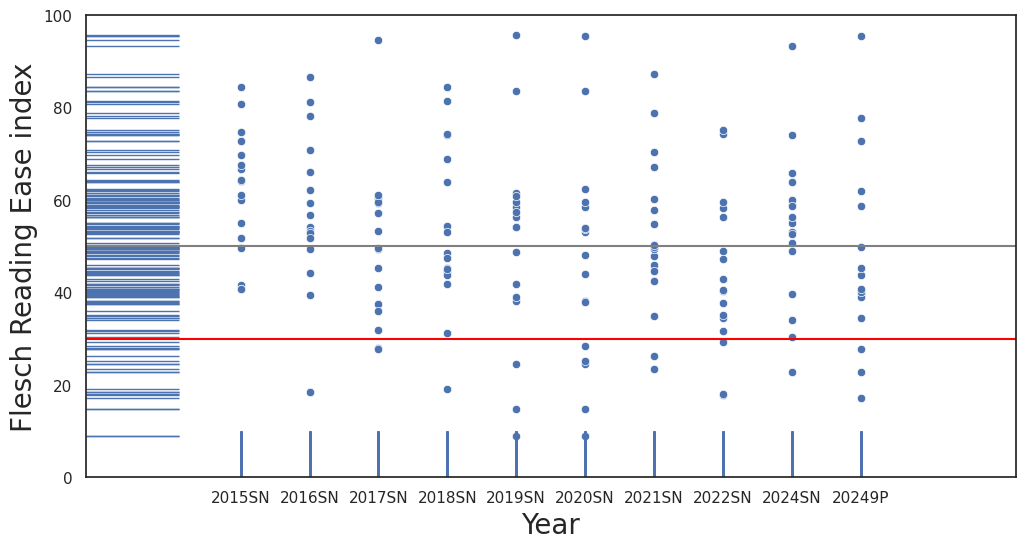

In [59]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FRE")
ax = sns.rugplot(data=df4, x="Year", y="FRE", height=.1)
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_byYear.png')

+ Score 1-3: Text is easy to read, suitable for early elementary school (ages 6-9).
+ Score 4-6: Understandable by upper elementary school students (ages 9-12).
+ Score 7-9: Suitable for junior high school students (ages 12-15).
+ Score 10-12: Appropriate for senior high school students (ages 15-18).
+ Score 13-15: Suitable for college students and above (ages 18+).
+ Score 16 and above: Advanced reading level, typically suitable for college graduates.

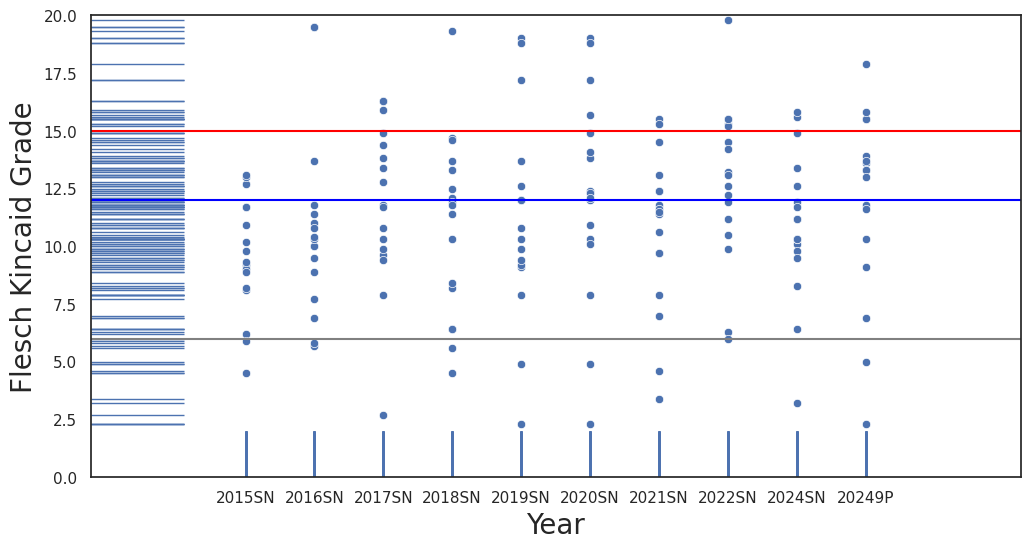

In [61]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FKG")
ax = sns.rugplot(data=df4, x="Year", y="FKG", height=.1)
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byYear.png')

In [62]:
a = df4.groupby('Year')['FKG'].describe()
a.to_csv('FKG_summary_by_Year.csv')

In [63]:
b = df4.groupby('Year')['FRE'].describe()
b.to_csv('FRE_summary_by_Year.csv')

In [64]:
b1 = df4.describe()
b1.to_csv('Readability_summary_total.csv')


# Getting individual numbers for the paper

In [65]:
b2 = df4[15 <= df3['GF']]
b2.shape

(50, 9)

In [ ]:
38/136

0.27941176470588236

In [66]:
a1 = df4[10 <= df3['DCRS']]
a1.shape

(39, 9)

In [ ]:
31/136

0.22794117647058823

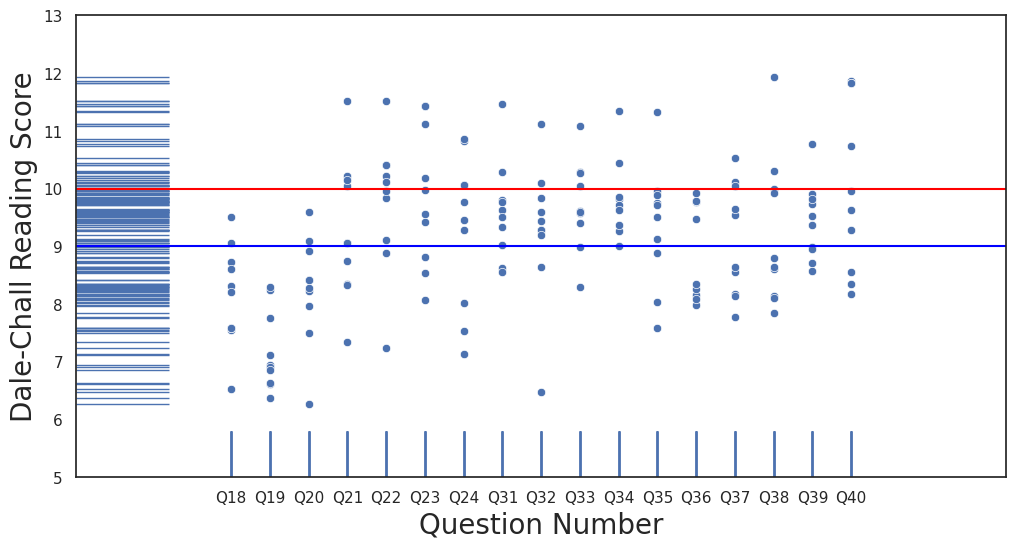

In [67]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="QN", y="DCRS")
ax = sns.rugplot(data=df4, x="QN", y="DCRS", height=.1)
ax.set_ylim([5,13])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Question Number', ylabel='Dale-Chall Reading Score')
ax.axhline(10, color="red")
ax.axhline(9, color="blue")
# ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_DCRS_byQN.png')

In [68]:
a2 = df4[10 <= df3['DCRS']]
a2.shape

(39, 9)

In [ ]:
74/136

0.5441176470588235

# Pie chart of readability indices

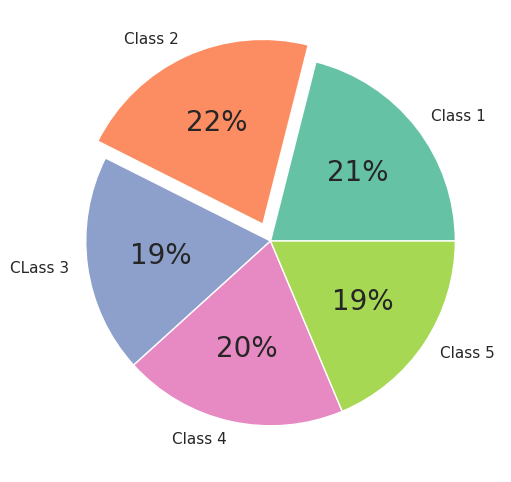

In [69]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work
# declaring data
data = [44, 45, 40, 41, 39]
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

# declaring exploding pie
explode = [0, 0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

## Data cut (categorize)

In [70]:
import pandas as pd

In [71]:
df4.head()

,Year,QN,N_Sents,TTR,MTLD,FRE,FKG,GF,DCRS
0,2015SN,Q18,8,0.728972,110.542069,74.79,6.2,8.72,8.73
1,2015SN,Q19,10,0.666667,62.363391,84.37,4.5,6.87,6.94
2,2015SN,Q20,6,0.623932,53.164604,51.68,10.9,13.95,9.60
3,2015SN,Q21,7,0.703125,112.313725,69.82,8.1,11.70,8.74
4,2015SN,Q22,6,0.703125,112.313725,66.78,9.2,12.90,8.89


In [74]:
## pd.cut: how to use

b1 = pd.cut(df4['FRE'], bins=[0, 30, 50, 60,1000], include_lowest=True, labels=['Very difficult', 'Difficult', 'Appropriate',"Easy"])

count = b1.value_counts()
print(count)

Difficult         60
Easy              49
Appropriate       39
Very difficult    22
Name: FRE, dtype: int64


<ipython-input-87-bbcb2e12c7f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Difficulty'] = pd.cut(df4['FRE'], bins=[0, 30, 50, 60, 1000], include_lowest=True,


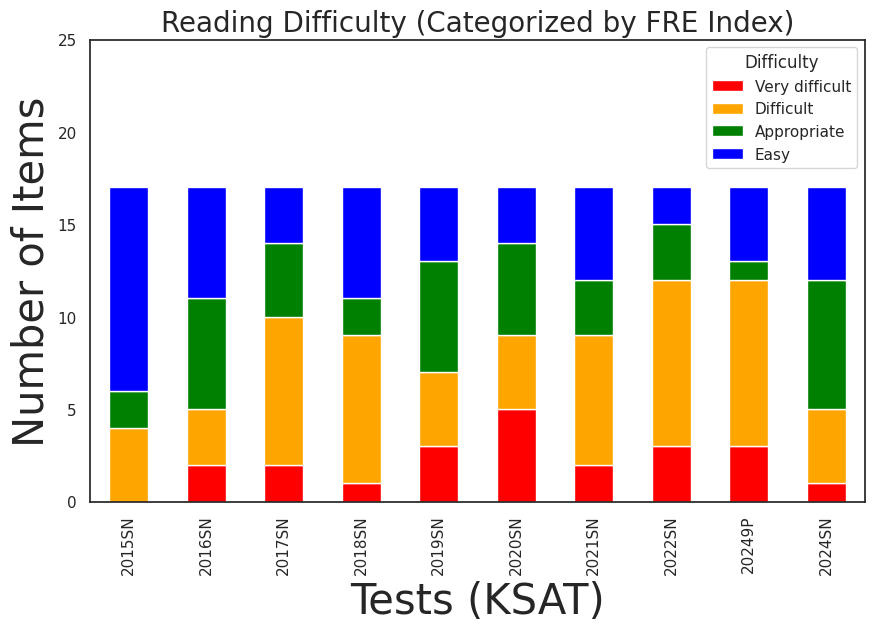

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame and it contains a 'Year' column and 'FRE' column

# Categorize the 'FRE' scores
df4['Difficulty'] = pd.cut(df4['FRE'], bins=[0, 30, 50, 60, 1000], include_lowest=True,
                           labels=['Very difficult', 'Difficult', 'Appropriate', 'Easy'])

# Group data by 'Year' and 'Difficulty' and count occurrences
grouped = df4.groupby(['Year', 'Difficulty']).size().unstack(fill_value=0)

# Define colors for each difficulty level
colors = ['red', 'orange', 'green', 'blue']  # Red for 'Very difficult', etc.

# Create a stacked bar plot with specified figure size and colors
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Adding labels and title
plt.ylim(0,25)
plt.xlabel('Tests (KSAT)')
plt.ylabel('Number of Items')
plt.title('Reading Difficulty (Categorized by FRE Index)')

# Display the plot
plt.show()


In [75]:
## pd.cut: how to use

b1 = pd.cut(df4['GF'], bins=[0, 9, 13, 16,20], include_lowest=True, labels=["Easy", 'Appropriate', 'Difficult', 'Very difficult'])

count = b1.value_counts()
print(count)

Difficult         56
Appropriate       54
Very difficult    30
Easy              24
Name: GF, dtype: int64


In [76]:
## pd.cut: how to use

b1 = pd.cut(df4['DCRS'], bins=[0, 7, 8, 9, 10], include_lowest=True, labels=["Easy", 'Appropriate', 'Difficult', 'Very difficult'])

count = b1.value_counts()
print(count)

Very difficult    62
Difficult         46
Appropriate       15
Easy               9
Name: DCRS, dtype: int64


In [ ]:
b1

0           Difficult
1                Easy
2      Very difficult
3           Difficult
4           Difficult
            ...      
131    Very difficult
132    Very difficult
133    Very difficult
134         Difficult
135    Very difficult
Name: DCRS, Length: 136, dtype: category
Categories (4, object): ['Easy' < 'Appropriate' < 'Difficult' < 'Very difficult']

===========================

[1] FRE pie chart

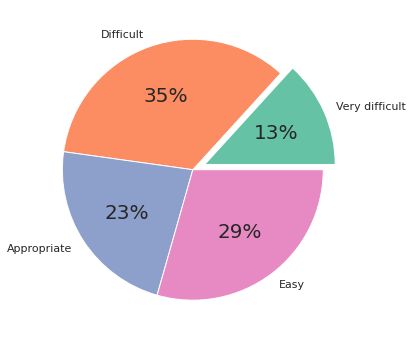

In [ ]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work

# declaring data
data = [18, 47, 31, 40]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Flesch Reading Ease")

plt.savefig('Pie_FRE.png')
plt.show()

[2] Gunning-Fog pie

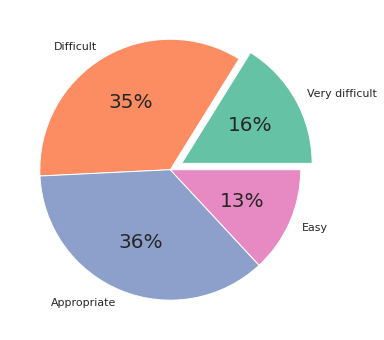

In [ ]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work

# declaring data
data = [21, 45, 47, 17]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Gunning-Fog")

plt.savefig('Pie_GF.png')
plt.show()

[3] Dale-Chall pie

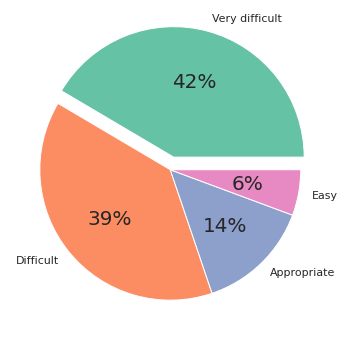

In [ ]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work

# declaring data
data = [44, 41, 15, 6]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Dale-Chall")

plt.savefig('Pie_DC.png')
plt.show()

# Statistic analysis for the data

In [ ]:
df5 = df3[['Year','QN','N_Splits','N_Sents','TTR','MATTR','MTLD','HDD','FRE','FKG','GF','DCRS']]
df5.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,MTLD,HDD,FRE,FKG,GF,DCRS
0,2015,Q18,107,8,0.728972,0.794828,110.542069,0.841506,74.79,6.2,8.72,8.73
1,2015,Q19,123,10,0.666667,0.795405,62.363391,0.824749,84.37,4.5,6.87,6.94
2,2015,Q20,117,6,0.623932,0.758529,53.164604,0.776571,51.68,10.9,13.95,9.60
3,2015,Q21,128,6,0.703125,0.813165,112.313725,0.848132,66.78,9.2,12.90,8.89
4,2015,Q22,128,6,0.703125,0.813165,112.313725,0.848132,66.78,9.2,12.90,8.89


In [ ]:
ld = df5[['TTR','MATTR','MTLD','HDD']]

In [ ]:
corrMatrix = ld.corr()
corrMatrix

,TTR,MATTR,MTLD,HDD
TTR,1.000000,0.745764,0.769432,0.837011
MATTR,0.745764,1.000000,0.818469,0.896942
MTLD,0.769432,0.818469,1.000000,0.857670
HDD,0.837011,0.896942,0.857670,1.000000


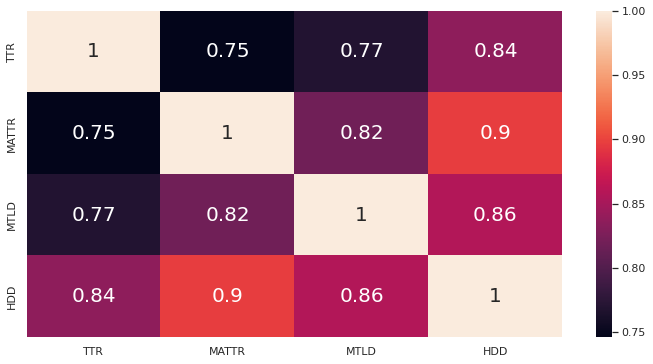

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white")

sn.heatmap(corrMatrix, annot=True)
plt.show()

# Others

The Gunning Fog index: It generates a grade level between 0 and 20. It estimates the education level required to understand the text.
Too many different words per thoughsand, not enough simple sentences, too difficult for the inteded audience.

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="GF")
ax = sns.rugplot(data=df4, x="Year", y="GF", height=.1)
ax.set_ylim([0,20])
# ax.set_xlim([0,150])
ax.set(xlabel='Year', ylabel='Dale-Chall Reading Score')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(9, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('GF_scatter.png')

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="DCRS")
ax = sns.rugplot(data=df4, x="Year", y="DCRS", height=.1)
ax.set_ylim([5,13])
# ax.set_xlim([0,150])
ax.set(xlabel='Year', ylabel='Dale-Chall Reading Score')
# ax.axhline(15, color="red")
ax.axhline(10, color="red")
ax.axhline(9, color="blue")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('DCRS_scatter.png')

========================================================

In [ ]:
df4['DCRS'].describe()

In [ ]:
plt.hist(df4['DCRS'], binwidth=1)

In [ ]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [ ]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

In [ ]:
df3 = df2.sort_values(by=['N_Splits'])

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [ ]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2

# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)

# Show the plot
plt.show()

In [ ]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df)

In [ ]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df)

# Show the plot
plt.show()

In [ ]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df)

In [ ]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

## Style: additionaal Boxplots

In [ ]:
import seaborn as sns
import numpy as np

### Setting the figure size

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) #set width and height

In [ ]:
df = df2
df = df[['Year','TTR','MSTTR','HDD','MTLD']]

dd=pd.melt(df,id_vars=['Year'],value_vars=['TTR','HDD','MSTTR'],var_name='fruits')
sns.boxplot(x='Year',y='value',data=dd,hue='fruits')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your data, e.g. results per algorithm:
data1 = [5,5,4,3,3,5]
data2 = [6,6,4,6,8,5]
data3 = [7,8,4,5,8,2]
data4 = [6,9,3,6,8,4]

# --- Combining your data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# --- Labels for your data:
labels_list = ['a','b']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1,
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2,
            labels=labels_list,
            sym=symbol,
            positions=positions_group2,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.savefig('boxplot_grouped.png')
plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
#plt.show()                   # uncomment to show the plot.

In [ ]:
dd = pd.melt(df3, id_vars = 'Year'],value_vars = ['TTR','HDD'],var_name='LD')
sns.boxplot(x = 'Year', y = 'LD index', data=dd, hue='LD')

### MTLD grouped plots

In [ ]:
datatop = df2.tail()
datatop

column names

In [ ]:
for col in df2.columns:
    print(col)

In [ ]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

In [ ]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df3

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df

In [ ]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
# import seaborn as sns; sns.set_theme()